## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

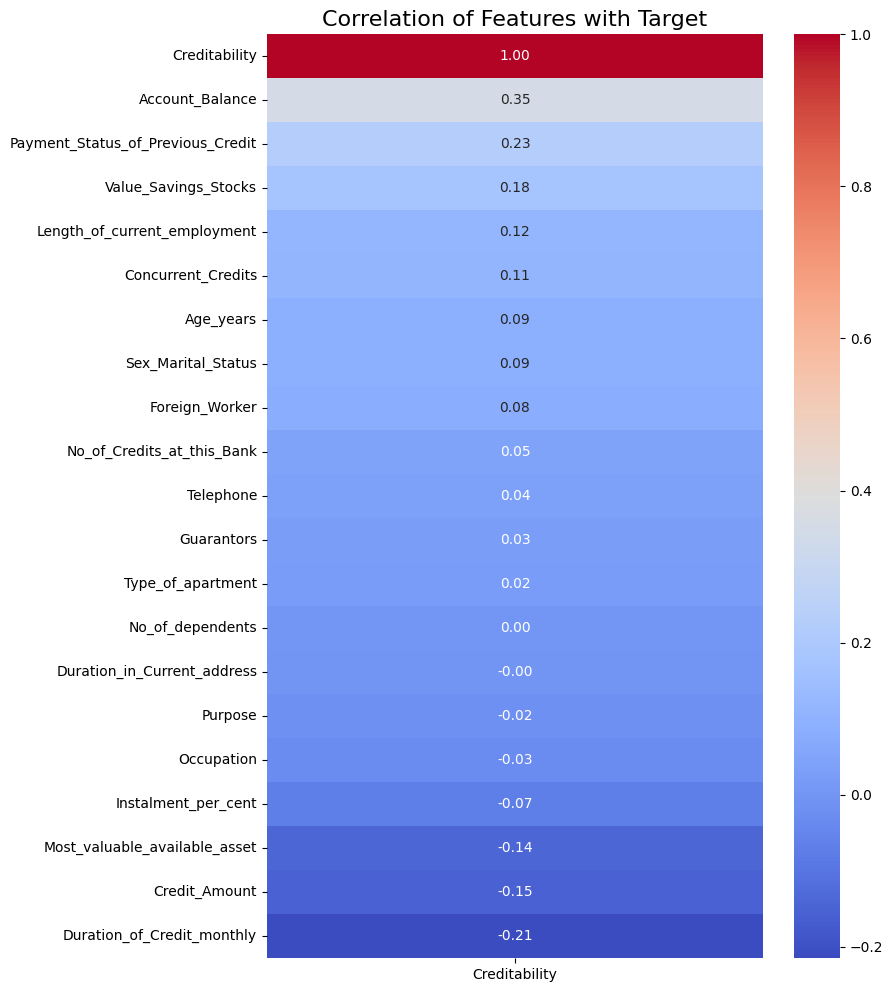

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразуем X_train и y_train в DataFrame и Series, если они являются numpy массивами
X_train = pd.DataFrame(X_train)  # Преобразуем X_train в DataFrame
y_train = pd.Series(y_train, name="target")  # Преобразуем y_train в Series и задаем имя

# Объединяем X_train и y_train в один DataFrame

# Вычисляем корреляции
correlation_matrix = data.corr()

# Оставляем только корреляции признаков с целевой переменной
correlation_with_target = correlation_matrix[['Creditability']].sort_values(by='Creditability', ascending=False)

# Построение тепловой карты
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Correlation of Features with Target", fontsize=16)
plt.show()

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

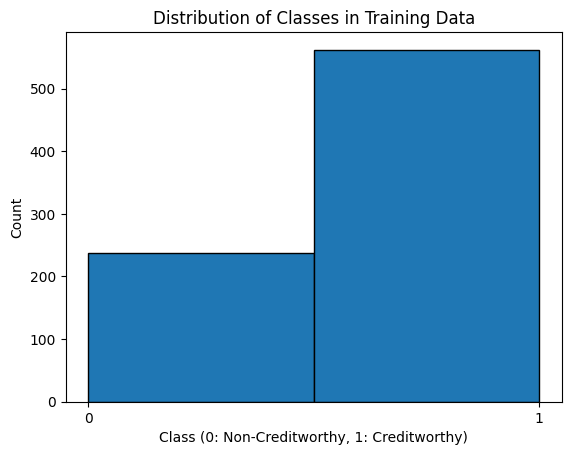

In [80]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

 ROC-AUC требует вероятностей классов, а не бинарных предсказаний. Поэтому заменим predict на predict_proba

In [81]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.76
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.75
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [82]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.60
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


# Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

##Балансировка классов

сбалансируем таргет


In [83]:
from sklearn.utils import class_weight
weights = class_weight.compute_sample_weight('balanced', y_train)

Стандартизация

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##GridSearch для RandomForest

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train, sample_weight=weights)
print("Лучшие параметры:", grid_rf.best_params_)

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


##GridSearch для GradientBoosting

In [86]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train, sample_weight=weights)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

##GridSearch для MLP

In [87]:
param_grid_mlp = {
    'hidden_layer_sizes': [(30,), (50,), (30, 20)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [500, 1000]
}
grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=5, scoring='roc_auc')
grid_mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(30,), (50,), (30, 20)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [500, 1000], 'solver': ['adam', 'lbfgs']},
             scoring='roc_auc')

##Оценка

Функции для оценки

In [88]:
# Функция для оценки
def evaluate_model(grid, X_test, y_test):
    best_model = grid.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Best params: {grid.best_params_}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")

Оценки моделей

In [89]:
print("Random Forest:")
evaluate_model(grid_rf, X_test, y_test)

print("Gradient Boosting:")
evaluate_model(grid_gb, X_test, y_test)

print("MLP:")
evaluate_model(grid_mlp, X_test, y_test)

Random Forest:
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
ROC-AUC: 0.790
Accuracy: 0.775
Precision: 0.821
Recall: 0.862

Gradient Boosting:
Best params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
ROC-AUC: 0.750
Accuracy: 0.740
Precision: 0.787
Recall: 0.855

MLP:
Best params: {'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
ROC-AUC: 0.779
Accuracy: 0.740
Precision: 0.807
Recall: 0.819



Есть заметное улучшение для Случайного леса. Очень серьезное улучшение для MLP. Бустинг не изменился.

Попробуем гридсерч с другими параметрами

##GridSearch для GradientBoosting 2

In [90]:
param_grid_gb = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train, sample_weight=weights)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [200, 500], 'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [91]:
print("Random Forest:")
evaluate_model(grid_rf, X_test, y_test)

print("Gradient Boosting:")
evaluate_model(grid_gb, X_test, y_test)

print("MLP:")
evaluate_model(grid_mlp, X_test, y_test)

Random Forest:
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
ROC-AUC: 0.790
Accuracy: 0.775
Precision: 0.821
Recall: 0.862

Gradient Boosting:
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
ROC-AUC: 0.770
Accuracy: 0.775
Precision: 0.835
Recall: 0.841

MLP:
Best params: {'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
ROC-AUC: 0.779
Accuracy: 0.740
Precision: 0.807
Recall: 0.819



MLP и RandomForest улучшить не получилось. Я оставил только gridsearch для gradient boosting, roc auc которого возрос до 0.770

##Уберем лишние столбцы

Попробуем убрать столбцы с наименьшей корреляцией с таргетом

In [92]:
df = data.drop(columns = ['No_of_Credits_at_this_Bank', 'Telephone', 'Guarantors', 'Type_of_apartment', 'No_of_dependents', 'Duration_in_Current_address', 'Purpose', 'Occupation'])
df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits,Foreign_Worker
0,1,1,18,4,1049,1,2,4,2,2,21,3,1
1,1,1,9,4,2799,1,3,2,3,1,36,3,1
2,1,2,12,2,841,2,4,2,2,1,23,3,1
3,1,1,12,4,2122,1,3,3,3,1,39,3,2
4,1,1,12,4,2171,1,3,4,3,2,38,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,1987,1,3,2,3,1,21,3,1
996,0,1,24,2,2303,1,5,4,3,1,45,3,1
997,0,4,21,4,12680,5,5,4,3,4,30,3,1
998,0,2,12,2,6468,5,1,2,3,4,52,3,1


In [93]:
x_new = df.iloc[:, 1:].to_numpy()
y_new = df.iloc[:, 0].to_numpy()

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [94]:
# Обучение Random Forest
rf_model_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_new.fit(x_train_new, y_train_new)

# Прогноз на тестовых данных
rf_pred_new = rf_model_new.predict(x_test_new)
rf_pred_proba_new = rf_model_new.predict_proba(x_test_new)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc_new = roc_auc_score(y_test_new, rf_pred_proba_new)
rf_accuracy_new = accuracy_score(y_test_new, rf_pred_new)
rf_precision_new = precision_score(y_test_new, rf_pred_new)
rf_recall_new = recall_score(y_test_new, rf_pred_new)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc_new:.2f}")
print(f"Accuracy: {rf_accuracy_new:.2f}")
print(f"Precision: {rf_precision_new:.2f}")
print(f"Recall: {rf_recall_new:.2f}")

# Обучение Gradient Boosting
gb_model_new = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_new.fit(x_train_new, y_train_new)

# Прогноз на тестовых данных
gb_pred_new = gb_model_new.predict(x_test_new)
gb_pred_proba_new = gb_model_new.predict_proba(x_test_new)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc_new = roc_auc_score(y_test_new, gb_pred_proba_new)
gb_accuracy_new = accuracy_score(y_test_new, gb_pred_new)
gb_precision_new = precision_score(y_test_new, gb_pred_new)
gb_recall_new = recall_score(y_test_new, gb_pred_new)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc_new:.2f}")
print(f"Accuracy: {gb_accuracy_new:.2f}")
print(f"Precision: {gb_precision_new:.2f}")
print(f"Recall: {gb_recall_new:.2f}")

Random Forest метрики:
ROC AUC: 0.76
Accuracy: 0.77
Precision: 0.79
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.78
Accuracy: 0.75
Precision: 0.78
Recall: 0.89


In [95]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model_new = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model_new.fit(x_train_new, y_train_new)

# Прогноз на тестовых данных
mlp_pred_new = mlp_model_new.predict(x_test_new)
mlp_pred_proba_new = mlp_model_new.predict_proba(x_test_new)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc_new = roc_auc_score(y_test_new, mlp_pred_proba_new)
mlp_accuracy_new = accuracy_score(y_test_new, mlp_pred_new)
mlp_precision_new = precision_score(y_test_new, mlp_pred_new)
mlp_recall_new = recall_score(y_test_new, mlp_pred_new)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc_new:.2f}")
print(f"Accuracy: {mlp_accuracy_new:.2f}")
print(f"Precision: {mlp_precision_new:.2f}")
print(f"Recall: {mlp_recall_new:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.67
Accuracy: 0.61
Precision: 0.77
Recall: 0.63


Получили максимальное значение для градиентного бустинга - 0.78. Остальные модели не очень. Пробуем грид серч

##GridSearch 3

In [96]:
grid_rf_new = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf_new.fit(x_train_new, y_train_new, sample_weight=weights)
print("Лучшие параметры:", grid_rf_new.best_params_)

Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
grid_gb_new = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_gb_new.fit(x_train_new, y_train_new, sample_weight=weights)

In [ ]:
grid_mlp_new = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=5, scoring='roc_auc')
grid_mlp_new.fit(x_train_new, y_train_new)

In [97]:
print("Random Forest:")
evaluate_model(grid_rf_new, x_test_new, y_test_new)

print("Gradient Boosting:")
evaluate_model(grid_gb_new, x_test_new, y_test_new)

print("MLP:")
evaluate_model(grid_mlp_new, x_test_new, y_test_new)

Random Forest:
Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
ROC-AUC: 0.761
Accuracy: 0.770
Precision: 0.791
Recall: 0.906

Gradient Boosting:
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
ROC-AUC: 0.775
Accuracy: 0.715
Precision: 0.829
Recall: 0.739

MLP:
Best params: {'alpha': 0.001, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'lbfgs'}
ROC-AUC: 0.781
Accuracy: 0.710
Precision: 0.733
Recall: 0.913



Видим, что грид серч помог только для MLP.

#Итоги
Итого получаем такие максимальные значения ROC-AUC:

RandomForest: 0.790

GradientBoosting: 0.78

MLP: 0.781